# Analisis Karakteristik Pelanggan Kartu Kredit "STAR" dengan Pendekatan K-means dan PCA

**Tujuan Proyek:**
Menganalisis dan mengidentifikasi karakteristik khusus dari pelanggan kartu kredit yang dikategorikan sebagai "STAR" selama periode 4 bulan dengan menggunakan teknik reduksi dimensi PCA dan algoritma clustering K-means. Proyek ini bertujuan untuk memberikan wawasan mendalam tentang pola transaksi dan fitur-fitur yang membedakan pelanggan "STAR" dari yang lain, dengan potensi mendukung pengambilan keputusan bisnis yang lebih baik.

# 1. Import Library

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import pickle
from sklearn.preprocessing import StandardScaler

# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# from sklearn_som.som import SOM
# from minisom import MiniSom

import time

%matplotlib inline
sns.set(color_codes=True)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.memory_usage', None)
# pd.set_option('display.width', None)

# 2. Read Data

In [87]:
# !pip install --upgrade xlrd==2.0.1
# !pip install --upgrade pandas
# !pip install --upgrade numpy


In [88]:
data = pd.read_csv('data.csv', sep = ';') # Dataframe yang diberikan

In [89]:
data

,bulan_m3,cif_m3,flag_m3,dana_m3,transfer_bni_m3,withdrawal_m3,transfer_antarbank_m3,isi_pulsa_m3,ovo_m3,gopay_m3,...,government_m0,pendidikan_m0,zis_qurban_m0,charity_m0,internet_m0,tapcash_m0,unmap_m0,dana_pensiun_m0,credit_card_m0,kliring_m0
0,202304,10346158754,NON STAR,0,0,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202304,10344861782,NON STAR,0,0,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202304,10344878435,NON STAR,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202304,10343994735,NON STAR,0,0,7,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202304,10346270050,NON STAR,0,0,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,202304,10346805827,STAR,0,0,10,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,202304,10343286676,STAR,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4423,202304,10344958661,STAR,0,3,4,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4424,202304,10346604993,STAR,0,0,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Columns: 144 entries, bulan_m3 to kliring_m0
dtypes: float64(105), int64(35), object(4)
memory usage: 4.9+ MB


In [91]:
data.flag_m3.unique()

array(['NON STAR', 'STAR'], dtype=object)

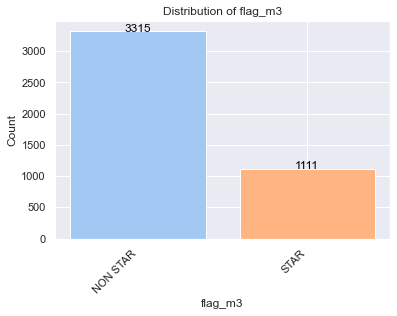

In [92]:

# Menghitung frekuensi masing-masing nilai dalam kolom 'flag_m3'
value_counts = data['flag_m3'].value_counts()

# Menggunakan palet warna seaborn
colors = sns.color_palette("pastel")

# Membuat bar chart dengan warna yang menarik
plt.bar(value_counts.index, value_counts.values, color=colors)
plt.xlabel('flag_m3')
plt.ylabel('Count')
plt.title('Distribution of flag_m3')

# Menambahkan label pada sumbu x
plt.xticks(rotation=45, ha='right')

# Menampilkan warna di sebelah kanan bar chart
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 0.1, str(v), color='black', ha='center')

plt.show()

# 3. Data Preprocessing

## 3.1 Menyimpan baris dengan nilai 'STAR' pada kolom 'flag_m3'

In [93]:
data = data.loc[data['flag_m3'] == 'STAR']

## 3.2 Drop kolom yang tidak digunakan 

In [94]:
# columns_to_drop = [ 'bulan_m3','cif_m3', 'flag_m3','flag_m2', 'flag_m1', 'flag_m0', 'bulan_m2', 'bulan_m1', 'bulan_m0', 'cif_m2', 'cif_m1', 'cif_m0']

# # Drop the specified columns
# df = data.drop(columns=columns_to_drop, axis=1)

In [95]:
def drop_columns_by_prefix(data, prefix_list):
    # Loop through each prefix in the list
    columns_to_drop = [col for col in data.columns if any(col.startswith(prefix) for prefix in prefix_list)]

    # Drop the specified columns
    df = data.drop(columns=columns_to_drop, axis=1)
    
    return df

# Contoh penggunaan fungsi dengan prefix yang diberikan
prefix_list = ['bulan_m', 'cif_m', 'flag_m']
df = drop_columns_by_prefix(data, prefix_list)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 539 to 4425
Columns: 132 entries, dana_m3 to kliring_m0
dtypes: float64(99), int64(33)
memory usage: 1.1 MB


In [97]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
kliring_m0,434,0.390639
listrik_m0,434,0.390639
antarbank_m0,434,0.390639
pdam_m0,434,0.390639
pajak_m0,434,0.390639
virtual_account_bni_m0,434,0.390639
multifinance_m0,434,0.390639
shopeepay_m0,434,0.390639
linkaja_m0,434,0.390639
mobiletunai_m0,434,0.390639


## 3. 3 Mengisi nilai null di seluruh DataFrame dengan 0

In [98]:
df = df.fillna(0)

In [99]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
dana_m3,0,0.0
paket_data_m1,0,0.0
credit_card_m1,0,0.0
dana_pensiun_m1,0,0.0
unmap_m1,0,0.0


# 3.4 Menghapus kolom-kolom yang seluruh isinya adalah 0

In [100]:
df_filtered = df.loc[:, (df != 0).any(axis=0)]

In [101]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 539 to 4425
Columns: 104 entries, dana_m3 to dana_pensiun_m0
dtypes: float64(78), int64(26)
memory usage: 911.4 KB


In [102]:
df_filtered

,dana_m3,transfer_bni_m3,withdrawal_m3,transfer_antarbank_m3,isi_pulsa_m3,ovo_m3,gopay_m3,linkaja_m3,listrik_m3,shopeepay_m3,...,pegadaian_m0,tiket_kai_m0,kartu_kredit_bni_m0,pendidikan_m0,zis_qurban_m0,charity_m0,internet_m0,tapcash_m0,unmap_m0,dana_pensiun_m0
539,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,0,0,3,0,0,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0,0,4,0,0,0,0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,0,2,4,8,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,10,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4423,0,3,4,0,0,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4424,0,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Unsupervised Learning

## Check Distribusi Data

Dalam evaluasi distribusi data pada setiap kolom, kami menggunakan beberapa metode statistik deskriptif. 
- Rata-rata (mean) memberikan gambaran tentang nilai tengah distribusi, 
- sementara median menilai pusat distribusi, 
- Skewness yang mengukur sejauh mana distribusi data condong atau asimetris, dapat diidentifikasi melalui nilai positif (ekor panjang di sebelah kanan nilai pusat) atau negatif (ekor panjang di sebelah kiri nilai pusat). 

Jika nilai mean dan median mirip, hal ini mengindikasikan kemungkinan simetri distribusi, sementara nilai skewness yang signifikan positif atau negatif dapat mengungkapkan adanya asimetri dalam distribusi tersebut.

In [103]:
statistics_data = []

for column in df_filtered.columns:
    if df_filtered[column].dtype in ['int64', 'float64']:
        column_stats = {
            "Nama Kolom": column,
            "Mean": df_filtered[column].mean(),
            "Median": df_filtered[column].median(),
            "Skewness": df_filtered[column].skew()
        }
        statistics_data.append(column_stats)

# Dataframe yang menampung Statitics Data
statistics_df = pd.DataFrame(statistics_data)

In [104]:
statistics_df.head()

,Nama Kolom,Mean,Median,Skewness
0,dana_m3,56.056706,0.0,19.826287
1,transfer_bni_m3,24.657966,0.0,10.007270
2,withdrawal_m3,4.483348,0.0,5.782277
3,transfer_antarbank_m3,2.848785,0.0,7.035908
4,isi_pulsa_m3,1.036904,0.0,9.107095


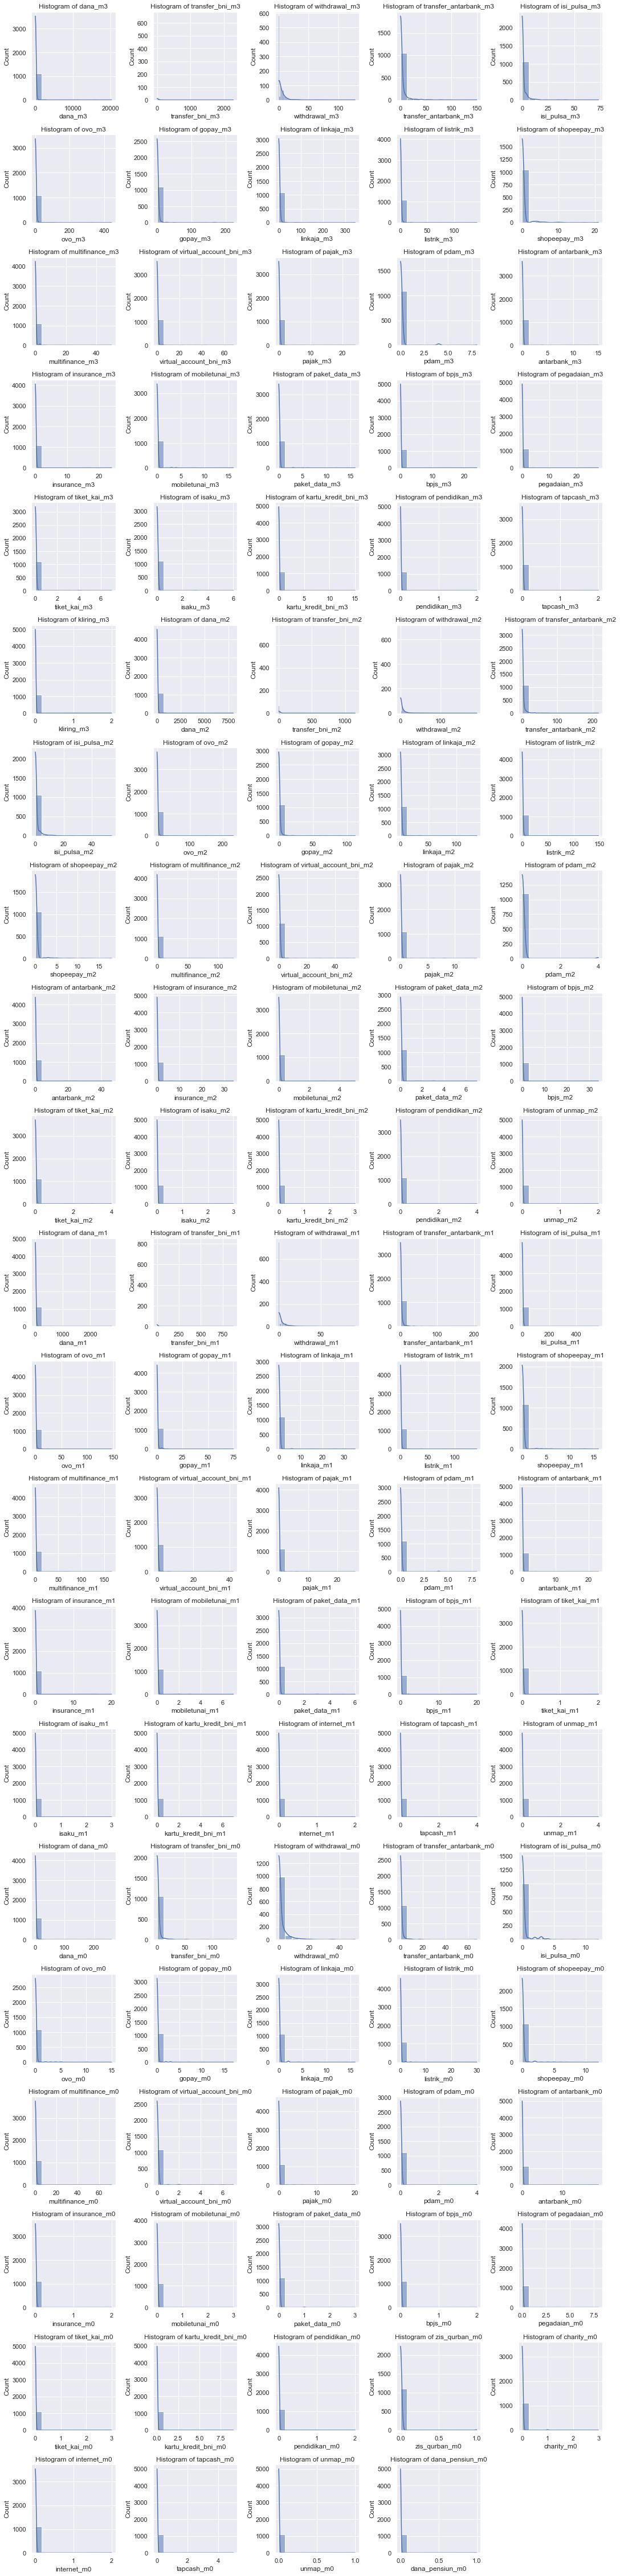

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil kolom yang ingin divisualisasikan (ganti sesuai kebutuhan)
selected_columns = df_filtered.columns

# Hitung jumlah kolom yang ingin divisualisasikan
num_columns = len(selected_columns)

# Tentukan jumlah kolom dan baris untuk grid visualisasi
num_cols_in_grid = 5
num_rows_in_grid = -(-num_columns // num_cols_in_grid)  # Pembulatan ke atas

# Inisialisasi subplot grid
fig, axes = plt.subplots(num_rows_in_grid, num_cols_in_grid, figsize=(15, 3 * num_rows_in_grid))

# Ratakan array dari subplot ke 1 dimensi jika perlu
axes = axes.flatten()

# Loop untuk menampilkan histogram setiap kolom
for i, column in enumerate(selected_columns):
    ax = axes[i]
    sns.histplot(df_filtered[column], ax=ax, kde=True)
    ax.set_title(f'Histogram of {column}')

# Hapus subplot yang tidak digunakan
for j in range(num_columns, num_rows_in_grid * num_cols_in_grid):
    fig.delaxes(axes[j])

# Atur layout untuk memastikan visualisasi terlihat dengan baik
fig.tight_layout()

# Tampilkan visualisasi
plt.show()


## Check Outlier Data

Untuk mendeteksi outlier pada setiap kolom, Kami menggunakan metode $IQR$ (Interquartile Range). Metode ini melibatkan perhitungan nilai $Q1$ (kuartil pertama), $Q3$ (kuartil ketiga), dan $IQR$ (selisih antara $Q3$ dan $Q1$). 

Outlier kemudian didefinisikan sebagai nilai di luar rentang ${Lower Fence} = Q1 - 1.5 \times {IQR}$ dan ${Upper Fence} = Q3 + 1.5 \times {IQR}$

Jadi, metode yang digunakan untuk mendeteksi outlier adalah metode IQR (Interquartile Range).

In [106]:
import pandas as pd

# Assuming df is your DataFrame
outliers_data = []

for column in df_filtered.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        column_outliers = df_filtered[(df_filtered[column] < lower_fence) | (df_filtered[column] > upper_fence)]
        
        outliers_data.append({
            "Nama Kolom": column,
            "Outliers Count": len(column_outliers),
        })

# Create a new DataFrame for the outliers
outliers_df = pd.DataFrame(outliers_data)

In [107]:
outliers_df.head()

,Nama Kolom,Outliers Count
0,dana_m3,156
1,transfer_bni_m3,144
2,withdrawal_m3,64
3,transfer_antarbank_m3,249
4,isi_pulsa_m3,164


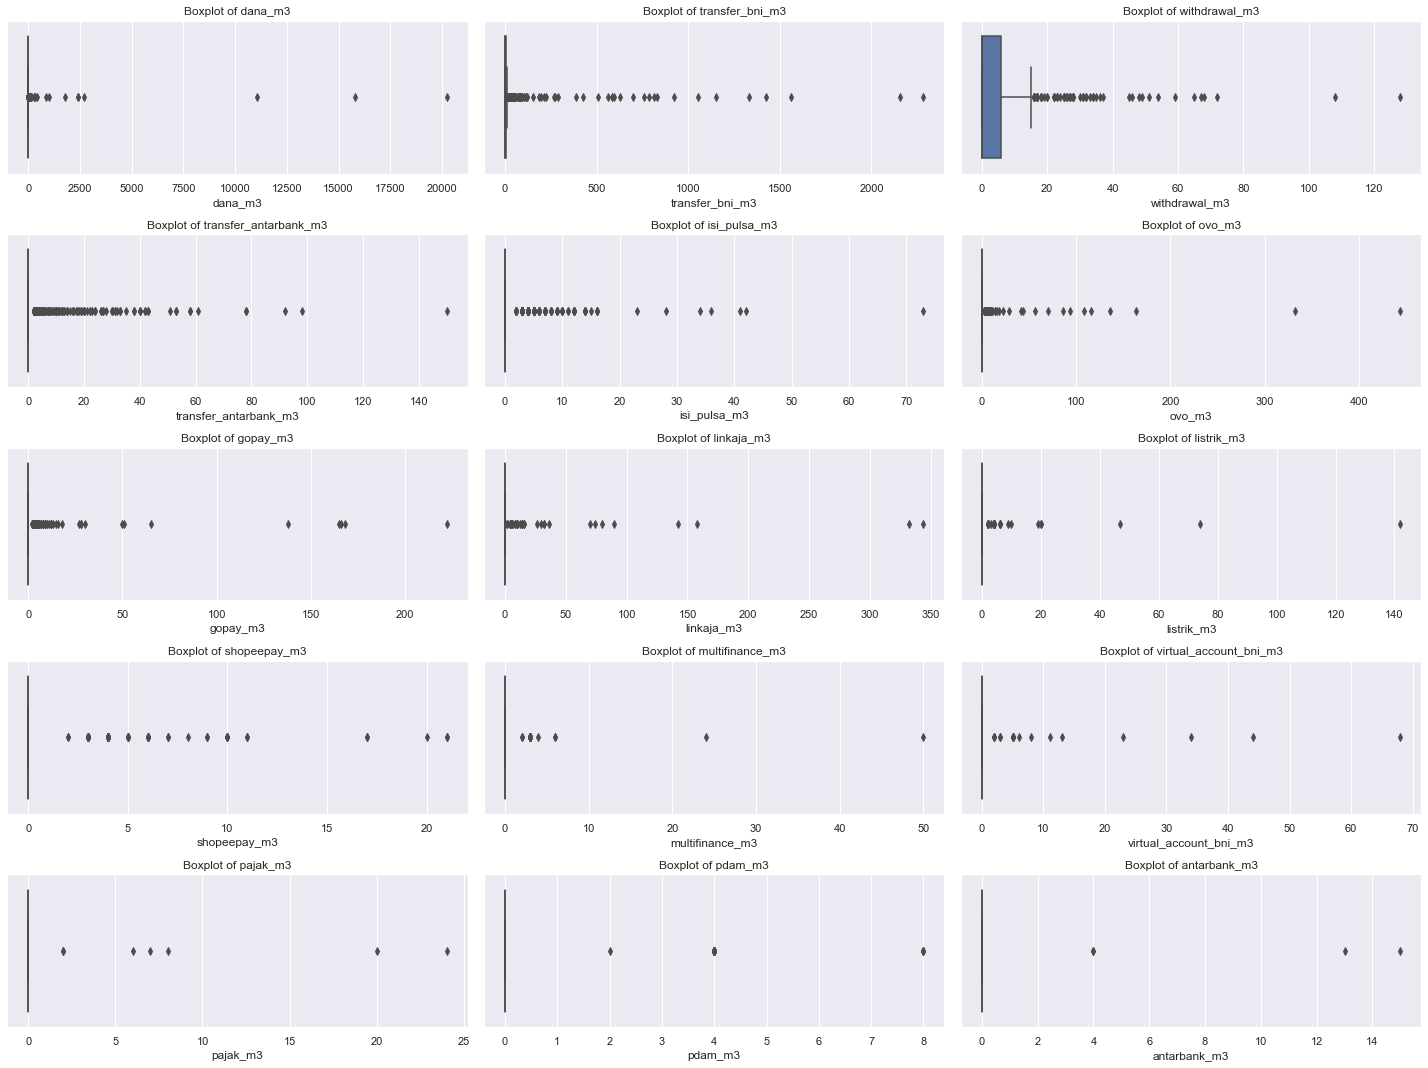

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 15 kolom pertama (ganti sesuai kebutuhan)
selected_columns = df_filtered.columns[:15]

# Inisialisasi subplot grid
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# Loop untuk menampilkan boxplot setiap kolom
for i, column in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df_filtered[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_xlabel(column)

# Hapus subplot yang tidak digunakan
for j in range(len(selected_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Atur layout untuk memastikan visualisasi terlihat dengan baik
fig.tight_layout()

# Tampilkan visualisasi
plt.show()


## Standarisasi

In [109]:
scaler = StandardScaler() #Object Scaler

In [110]:
cols = df_filtered.columns
X_scaled_data_std = scaler.fit_transform(df_filtered)
X_scaled_data_std = pd.DataFrame(X_scaled_data_std, columns = [cols])
# original_data = scaler.inverse_transform(scaled_data)

In [111]:
X_scaled_data_std.head()

,dana_m3,transfer_bni_m3,withdrawal_m3,transfer_antarbank_m3,isi_pulsa_m3,ovo_m3,gopay_m3,linkaja_m3,listrik_m3,shopeepay_m3,...,pegadaian_m0,tiket_kai_m0,kartu_kredit_bni_m0,pendidikan_m0,zis_qurban_m0,charity_m0,internet_m0,tapcash_m0,unmap_m0,dana_pensiun_m0
0,-0.066011,-0.166166,-0.480416,-0.290035,-0.257312,-0.096211,-0.115014,-0.091024,-0.075935,-0.195524,...,-0.051238,-0.030015,-0.033149,-0.040284,-0.067237,-0.075929,-0.042467,-0.030015,-0.030015,-0.030015
1,-0.066011,-0.166166,-0.480416,-0.290035,-0.257312,-0.096211,-0.115014,-0.091024,-0.075935,-0.195524,...,-0.051238,-0.030015,-0.033149,-0.040284,-0.067237,-0.075929,-0.042467,-0.030015,-0.030015,-0.030015
2,-0.066011,-0.166166,-0.158949,-0.290035,-0.257312,-0.096211,-0.115014,-0.091024,-0.075935,0.918460,...,-0.051238,-0.030015,-0.033149,-0.040284,-0.067237,-0.075929,-0.042467,-0.030015,-0.030015,-0.030015
3,-0.066011,-0.166166,-0.051793,-0.290035,-0.257312,-0.096211,-0.115014,-0.091024,-0.075935,2.032445,...,-0.051238,-0.030015,-0.033149,-0.040284,-0.067237,-0.075929,-0.042467,-0.030015,-0.030015,-0.030015
4,-0.066011,-0.152688,-0.051793,0.524446,-0.257312,-0.096211,-0.115014,-0.091024,-0.075935,-0.195524,...,-0.051238,-0.030015,-0.033149,-0.040284,-0.067237,-0.075929,-0.042467,-0.030015,-0.030015,-0.030015


# PCA (Principal Component Analysis)

## Object PCA dan Fit_Transform datanya ke Principal Components

In [112]:
from sklearn.decomposition import PCA

In [113]:
# Initialize the PCA model with the desired number of components
pca = PCA(n_components=0.95)

# Fit and transform the data
transformed_data = pca.fit_transform(X_scaled_data_std)

In [114]:
# Buat DataFrame dengan kolom PCA-1, PCA-2, dst.
column_names = [f'PCA-{i}' for i in range(1, transformed_data.shape[1] + 1)]
hasil_pca_sklearn = pd.DataFrame(data=transformed_data, columns=column_names)

In [115]:
hasil_pca_sklearn.head()

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,...,PCA-51,PCA-52,PCA-53,PCA-54,PCA-55,PCA-56,PCA-57,PCA-58,PCA-59,PCA-60
0,-0.188937,-0.438780,-0.121170,0.173422,-0.698099,-0.557619,0.048418,0.168876,0.137244,0.254656,...,-0.004261,0.003501,0.041931,-0.024861,-0.025814,-0.027470,-0.021195,-0.014095,-0.009744,-0.022117
1,-0.189618,-0.439930,-0.120884,0.144041,-0.612164,-0.460264,0.032468,0.199758,0.133220,0.302705,...,0.004215,-0.006659,0.059478,-0.010353,-0.037453,-0.025026,-0.019811,0.012000,0.000232,-0.019446
2,-0.194811,-0.085423,-0.150521,-0.016807,0.015988,-0.870738,-0.288608,-0.577691,-1.202670,-0.281555,...,-0.782193,-0.445513,-1.105716,1.203889,0.512970,0.094390,-0.160792,-0.105700,0.103243,0.939309
3,-0.177972,-0.095534,-0.135908,0.061871,-0.217739,-0.832112,-0.126702,-0.220954,-0.550058,0.021605,...,-0.123496,0.062407,-0.094825,-0.173253,-0.443277,0.577210,-0.090050,-0.226636,0.212759,-0.021968
4,-0.145014,-0.462745,0.371758,-0.473628,1.149305,1.374060,-0.536772,0.200811,-0.012781,0.516618,...,-0.012751,-0.013595,0.204105,-0.088656,0.078931,-0.036672,0.023926,0.146477,0.097451,0.013840


# K-Means Clustering

In [116]:
from sklearn.cluster import KMeans

- Clustering itu tidak memperhatikan balancing terhadap class, Jadi tidak memerlukan Oversampling.
- K-means memperhatikan datanya harus numerik dan tidak string, jika string maka harus di encoding terlebih dahulu.
- Untuk membuat algoritma lebih smooth, skala data harus diseragamkan, teknik penyeragaman bisa menggunakan min max scaler atau standart scaller
- Berpengaruh terhadap adanya Outlier. Namun Setelah skala diseragamkan, outlier bisa diabaikan

## The Elbow of Kmeans

In [117]:
inersia_values = []
for i in range(1, 16):
    kmeans_std = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
    kmeans_std.fit(X_scaled_data_std)
    inersia_values.append(kmeans_std.inertia_)
# inertia_values = [KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, tol=0.0001).fit(X_scaled_data_std).inertia_ for i in range(1, 16)]
# inertia_values = map(lambda i: KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, tol=0.0001).fit(X_scaled_data_std).inertia_, range(1, 16))


AttributeError: 'NoneType' object has no attribute 'split'

In [77]:
inersia_values

[]

ValueError: x and y must have same first dimension, but have shapes (15,) and (0,)

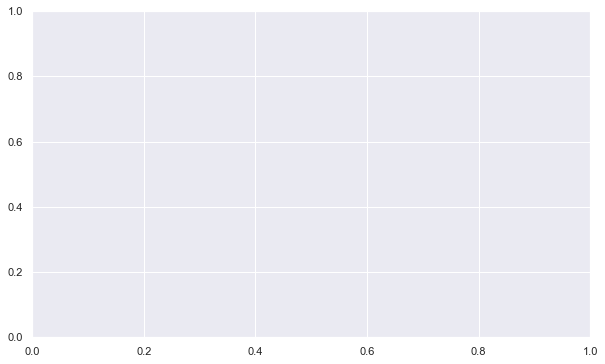

In [78]:
# Plot Elbow Method with Labels
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inersia_values, marker='o', linestyle='-', color='b')

# Menambahkan label untuk setiap titik data
for i, inertia in enumerate(inersia_values):
    plt.text(i + 1.2, inertia, f'{inertia:.2f}', ha='left', va='bottom', fontsize=10)

plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia Value', fontsize=14)
plt.xticks(range(1, 16))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [80]:
data = transformed_data.copy() # data sesudah std dan digunakan untuk k-means

In [84]:
# Apply K-means clustering
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto', max_iter = 500, tol = 0.0001)
km.fit(X_scaled_data_std)
predicted_labels = km.labels_

AttributeError: 'NoneType' object has no attribute 'split'

In [85]:
predicted_labels

NameError: name 'predicted_labels' is not defined

In [ ]:
km_2_pca.cluster_centers_[:, 0], km_2_pca.cluster_centers_[:, 1]

In [ ]:
# Create a larger figure
plt.figure(figsize=(15, 12))

# Plot the K-means clustered data points
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8, label='Original Data')

# Plot the cluster centers
plt.scatter(km_2_pca.cluster_centers_[:, 0], km_2_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Tambahkan kolom 'cluster' ke DataFrame 'data'
df['cluster'] = km_2_pca.labels_

In [ ]:
df.cluster.unique()

In [ ]:
df.groupby('cluster').count()

In [ ]:
df

In [ ]:
df[df['cluster'] == 2]

# Statistik Ringkasan untuk Setiap Cluster:

In [ ]:
cluster_stats = df.groupby('cluster').mean()
cluster_stats


# Visualisasi Cluster

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi fitur utama untuk setiap cluster
for feature in df.columns[:-1]:  # Exclude kolom 'cluster'
    sns.kdeplot(data=df, x=feature, hue='cluster', common_norm=False)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# Pairplot untuk melihat hubungan antar fitur di setiap cluster
sns.pairplot(df, hue='cluster')
plt.show()


# Visualisasi Pusat Cluster:

In [ ]:
# Plot lokasi pusat cluster di atas data
plt.scatter(data['feature1'], data['feature2'], c=km_2_pca.labels_, cmap='viridis', s=50)
plt.scatter(km_2_pca.cluster_centers_[:, 0], km_2_pca.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Cluster Centers and Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# Tampilkan ringkasan statistik untuk setiap cluster
cluster_stats = df.groupby('cluster').describe()
print(cluster_stats)
